In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Auto_Insurance_Claims_amount.csv'
df_auto_insu = pd.read_csv(url)
df_auto_insu.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [2]:
df_auto_insu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

In [3]:
df_auto_insu.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [4]:
df_auto_insu.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


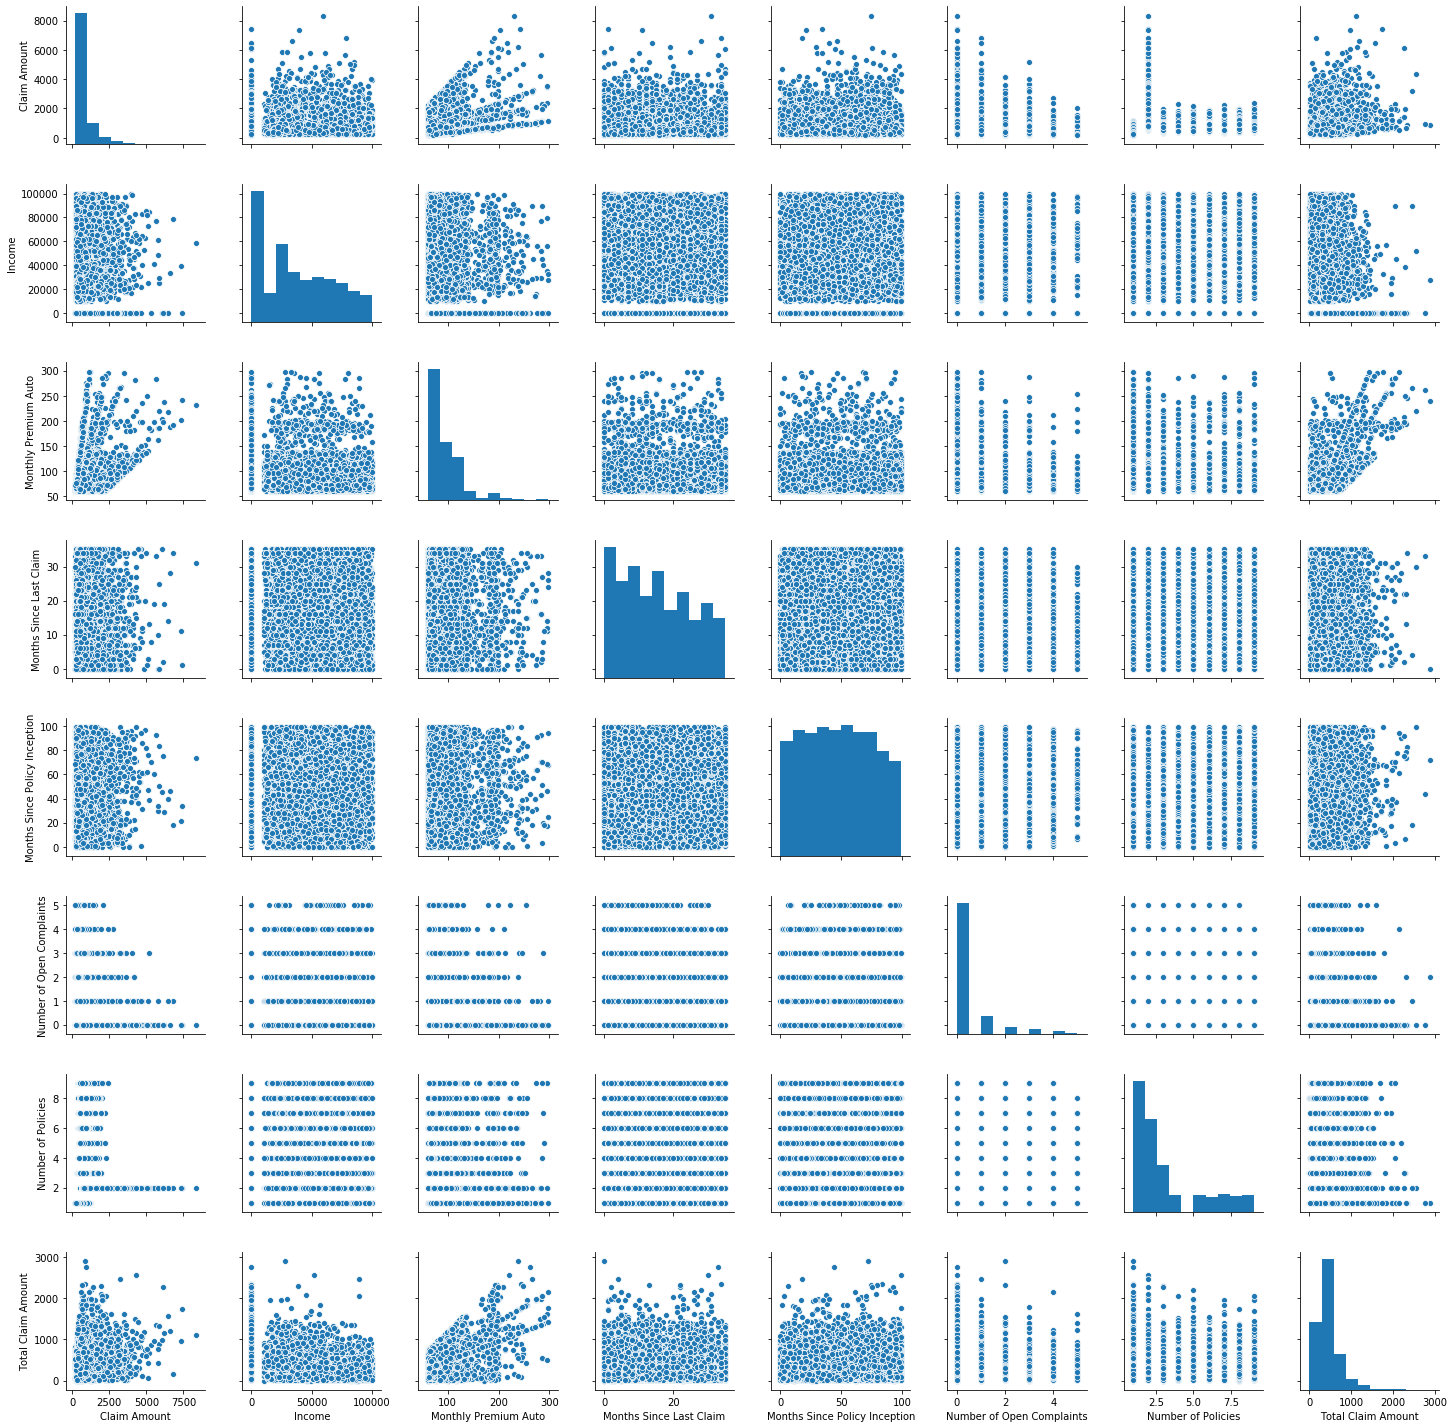

In [5]:
import seaborn as sns
sns.pairplot(df_auto_insu)

In [6]:
df_auto_insu.apply(lambda x: len(x.unique()))

Customer                         9134
Country                             1
State Code                          5
State                               5
Claim Amount                     8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Claim Reason                        4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64

In [7]:
# Based on above data, Customer is not important as it is unique customer identification number
# Country is for US only and we can drop this
# State code and State are same value, we can remove State
df_auto_insu.drop(['Customer', 'Country', 'State'], axis = 1, inplace = True)

In [8]:
df_auto_insu.head()

,State Code,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,KS,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,NE,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,OK,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,MO,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,KS,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [9]:
# Claim amount is per incident, total claim amount is total claimed during his policy period. We need to estimate claim amount per incident.
# Hence we can remove Total Claim Amount
df_auto_insu.drop(['Total Claim Amount'], axis = 1, inplace = True)

In [10]:
df_auto_insu.head()

,State Code,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
0,KS,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,Two-Door Car,Medsize
1,NE,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,Four-Door Car,Medsize
2,OK,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,Two-Door Car,Medsize
3,MO,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,SUV,Medsize
4,KS,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,Four-Door Car,Medsize


In [11]:
#Filter categorical variables
categorical_columns = [x for x in df_auto_insu.dtypes.index if df_auto_insu.dtypes[x]=='object']

#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible:',col)
    print (df_auto_insu[col].value_counts())


Frequency of Categories for varible: State Code
MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State Code, dtype: int64

Frequency of Categories for varible: Response
No     7826
Yes    1308
Name: Response, dtype: int64

Frequency of Categories for varible: Coverage
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

Frequency of Categories for varible: Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

Frequency of Categories for varible: Effective To Date
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
1/28/11    169
2/26/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/28/11    161
2/10/11    161
1/29/11    160
1/2/11     160
1/21/11    160
2/3/11     158
2/5/11     158
2/22/11    158

In [12]:
#Vehicle Size should be Small < Medium < Large
# Education should be High School or Below < College < Bachelor < Master < doctor
# coverage should be Basic < Extended < Premium
df_auto_insu['Vehicle Size'] = df_auto_insu['Vehicle Size'].replace({'Small':0,
                                                             'Medsize':1,
                                                             'Large':2})
df_auto_insu['Education'] = df_auto_insu['Education'].replace({'High School or Below':0,
                                                             'College':1,
                                                             'Bachelor':2,
                                                              'Master':3,
                                                              'Doctor':4})
df_auto_insu['Coverage'] = df_auto_insu['Coverage'].replace({'Basic':0,
                                                             'Extended':1,
                                                             'Premium':2})


In [13]:
df_auto_insu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
State Code                       9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null int64
Education                        9134 non-null int64
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               9134 non-null int64
Policy Type                      913

In [14]:
#One Hot Coding to convert object types to numeric values
df_auto_insu = pd.get_dummies(df_auto_insu, columns=['State Code','Response','EmploymentStatus','Gender','Location Code','Marital Status',
                              'Policy Type','Policy','Claim Reason', 'Sales Channel', 'Vehicle Class'])

In [15]:
#We can drop Effective To Date as it is duplicate column of Month Since Policy Inception
df_auto_insu.drop(['Effective To Date'], axis=1, inplace=True)

In [16]:
#Split the data into Train and test
X = df_auto_insu.drop(['Claim Amount'], axis=1)
y = df_auto_insu['Claim Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

### Modeling

In [17]:
#We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5, random_state = 1)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X_train, y_train)

In [19]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,643.353205,0.163152
1,Ridge Regression,643.330775,0.163210
2,Lasso Regression,642.057438,0.166533
3,K Neighbors Regressor,711.989868,-0.027753
4,Decision Tree Regressor,541.293519,0.398216
5,Random Forest Regressor,394.207430,0.679485
6,Gradient Boosting Regressor,394.112292,0.685116
7,Adaboost Regressor,602.077904,0.225473


In [20]:
#now increasing number of trees and decreasing learning rate proportionally
clf = GradientBoostingRegressor(random_state=1, max_depth=20, 
                                min_samples_split=170, n_estimators=230*2, 
                                learning_rate=0.2/2)
print("R Squared Train average score:",cross_val_score(clf, X_train, y_train, cv=cv, scoring='r2').mean())

clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
print("Train score:", clf.score(X_train, y_train))
print ("Test score:", clf.score(X_test, y_test))

R Squared Train average score: 0.660441096161285
Train score: 0.994736770220703
Test score: 0.6143401390246904
